In [43]:
import pandas as pd
import scipy as sp
import statistics
from scipy import stats

#Задача 1 - Проверка нормальности распределения данных с помощью критерия Шапиро-Уилка

Проверить, соответствует ли распределение длины лепестков (petal length) вида Iris setosa нормальному распределению.

Import dataset with url:

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

Initial dataset review:

In [29]:
df.head()

,"sepal length, cm","sepal width, cm","petal length, cm","petal width, cm",class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Assigning column names:

In [6]:
df.columns = ['sepal length, cm', 'sepal width, cm', 'petal length, cm', 'petal width, cm', 'class']

Slicing to obtain the required series:

In [17]:
petal_length = df['petal length, cm'][df['class'] == 'Iris-setosa']

Performing Shapiro-Wilk test:

In [138]:
stats.shapiro(petal_length).statistic

0.9563882261708665

Thus the null hypothesis that the petal lengths of the Iris setosa flowers are normally distributed cannot be rejected.

Visualization is performed below.

<Axes: >

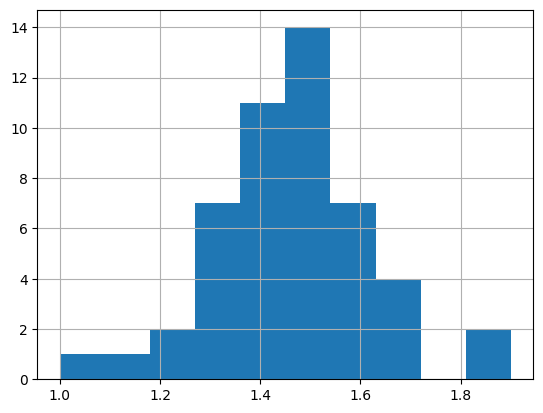

In [28]:
petal_length.hist()

#Задача 2 - Сравнение средних значений двух групп с использованием T-критерия

Проверить, есть ли статистически значимая разница в возрасте пассажиров мужчин и женщин на Титанике.

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Notice some NaN values in the Age column. The count is around 20%, so it can be dropped without significant statistical influence.

In [79]:
male = df[df['Sex'] == 'male']
female = df[df['Sex'] == 'female']

In [130]:
p_value = stats.ttest_ind(male['Age'], female['Age'], equal_var = False, nan_policy = 'omit').pvalue
print(p_value)

0.011814913211889735


In [131]:
stats.ttest_ind(male['Age'], female['Age'], equal_var = False, nan_policy = 'omit')

TtestResult(statistic=2.5258975171938896, pvalue=0.011814913211889735, df=560.0505568947057)

p-value is lower than usual significance level α = 0.05, therefore there is some correlation between sex and age of Titanic passengers.

#Задание 3 - Одновыборочный T-тест для проверки среднего значения

Проверить, отличается ли средняя длина чашелистика (sepal_length) вида Iris virginica от 6.0 см.

In [83]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.columns = ['sepal length, cm', 'sepal width, cm', 'petal length, cm', 'petal width, cm', 'class']

In [100]:
df['class']

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
144,Iris-virginica
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica


In [89]:
df_virginica = df[df['class'] =='Iris-virginica']

In [91]:
stats.ttest_1samp(df_virginica['sepal length, cm'], 6.0)

TtestResult(statistic=6.538640203826253, pvalue=3.440967849428443e-08, df=49)

We see that the p-value of the t-test is much lower than usual values of α, therefore, we reject the null hypothesis.

# Задание 4 - Сравнение медиан двух независимых выборок с помощью U-критерия Манна-Уитни

Проверить, отличается ли медианный размер клюва (bill_length_mm) между видами пингвинов Adelie и Chinstrap.

In [102]:
df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [111]:
adelie = df[df['species'] == 'Adelie']
chinstrap = df[df['species'] == 'Chinstrap']

In [125]:
stats.mannwhitneyu(adelie['bill_length_mm'], chinstrap['bill_length_mm'], nan_policy='omit')

MannwhitneyuResult(statistic=101.0, pvalue=4.132307082064524e-31)

Attaining a really low p-value, we conclude the median values to be statistically different for different species.